In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
IRIS = pd.read_csv('/content/IRIS-FLOWERS.csv')

In [108]:
IRIS

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [109]:
IRIS.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
IRIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
# Check for missing values in the dataset
IRIS.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [112]:
# Display the count of each species in the 'species' column
IRIS['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

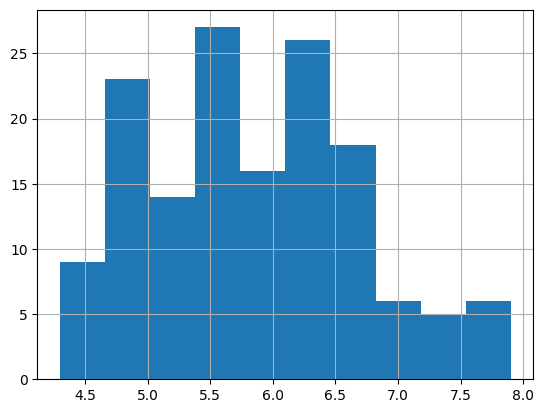

In [113]:
# Visualize the distribution of sepal length
IRIS['sepal_length'].hist()

<Axes: >

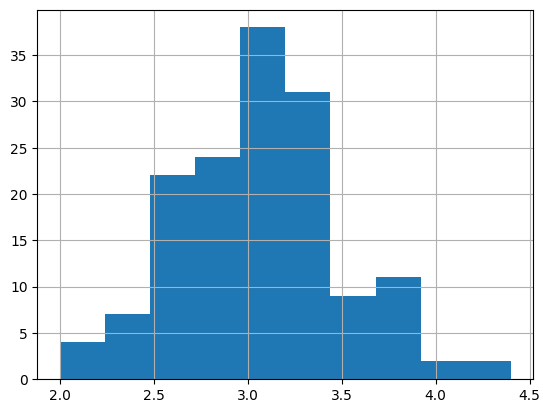

In [114]:
# Visualize the distribution of sepal width
IRIS['sepal_width'].hist()

<Axes: >

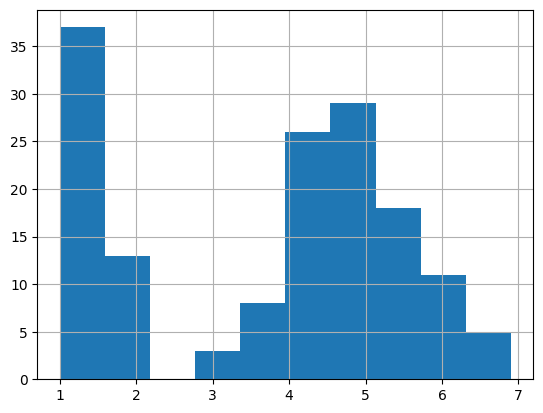

In [115]:
# Visualize the distribution of petal length
IRIS['petal_length'].hist()

<Axes: >

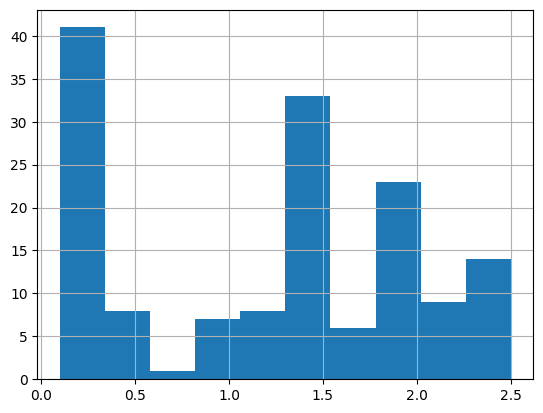

In [116]:
# Visualize the distribution of petal width
IRIS['petal_width'].hist()

In [117]:
# Colors and species for visualization
colors=['red','orange','blue']
species=['Iris-setosa ','Iris-versicolor','Iris-virginica']

In [118]:
# Scatter plots to visualize relationships between different features

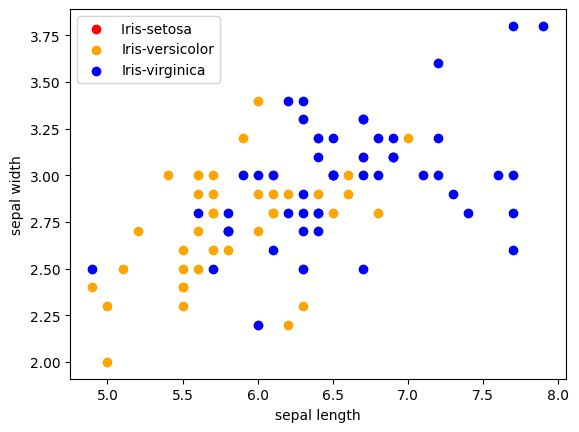

In [119]:
# Sepal length vs Sepal width
for i in range (3):
    x=IRIS[IRIS['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

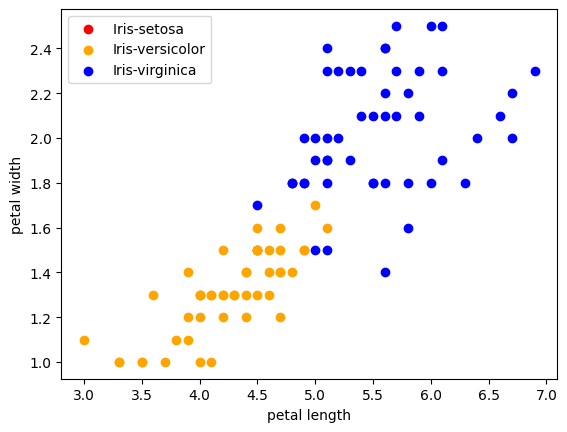

In [120]:
# Petal length vs Petal width
for i in range (3):
    x=IRIS[IRIS['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

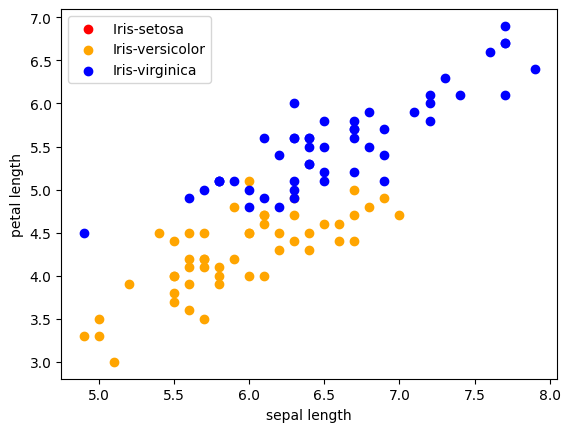

In [121]:
# Sepal length vs Petal length
for i in range (3):
    x=IRIS[IRIS['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

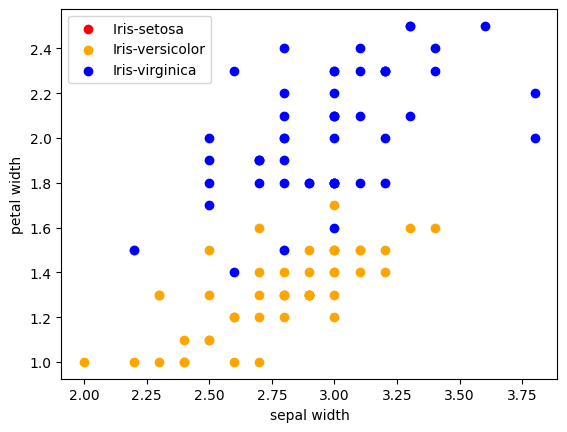

In [122]:
# Sepal width vs Petal width
for i in range (3):
    x=IRIS[IRIS['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [123]:
# Calculate and visualize the correlation matrix
IRIS.corr()

<ipython-input-123-70b1e8526c7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IRIS.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-124-b236f116c1c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=IRIS.corr()


<Axes: >

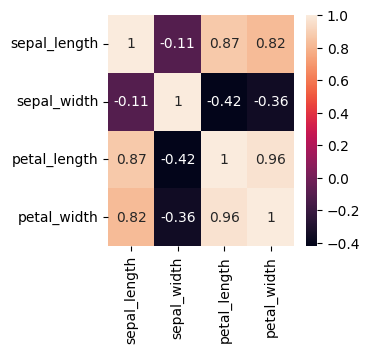

In [124]:
corr=IRIS.corr()
fig, ax=plt.subplots(figsize=(3,3))
sns.heatmap(corr,annot=True,ax=ax)

In [125]:
# Label encoding for the 'species' column
LE=LabelEncoder()
IRIS['species']=LE.fit_transform(IRIS['species'])
IRIS.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [126]:
# Separate features (x) and target variable (y)
x=IRIS.drop(columns='species')
y=IRIS['species']

In [127]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [128]:
# Initialize and train a Logistic Regression model
LR=LogisticRegression(solver='sag', max_iter=2000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [129]:
# Initialize and train a K-Nearest Neighbors (KNN) model
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [130]:
# Initialize and train a Decision Tree model
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
# Calculate accuracy for KNN and Decision Tree models on the test set
KNN_accuracy=KNN.score(x_test,y_test)*100
DT_accuracy=DT.score(x_test,y_test)*100